In [2]:
rm(list=ls())
# dependencies
Sys.setenv(LANG = "en")
Sys.setenv(JAVA_HOME = "C:\\Program Files\\Java\\jre1.8.0_261")
library(readr)
library(ggplot2)
library(ggcorrplot)
library(dplyr)
library(dummies)
library(fastDummies)
library(olsrr)
library(rJava)
library(glmulti)
library(stargazer)
library(car)
library("lmtest")
library("tseries")
library("sandwich")



library("MASS")
library("sandwich")
library("zoo")
library("car")
library("lmtest")
library("Formula")
library("plm")
library("stargazer")


df <- read_csv("../../data/main_research/processed_data/final_dataset.csv")

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

dummies-1.5.6 provided by Decision Patterns

Warning message:
"package 'fastDummies' was built under R version 3.6.3"Warning message:
"package 'olsrr' was built under R version 3.6.3"
Attaching package: 'olsrr'

The following object is masked from 'package:datasets':

    rivers

Warning message:
"package 'rJava' was built under R version 3.6.3"Warning message:
"package 'glmulti' was built under R version 3.6.3"Loading required package: leaps

Please cite as: 

 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.
 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 

Loading required package: carData

Attaching package: 'car'

The following object is masked from 'package:

In [3]:
# Dataset preparation
## Removing redundant variables
# df$country_name <- NULL
df$country_text_id <- NULL
df$continent <- NULL
df$sub_region <- NULL
df$region_pol <- NULL

In [4]:
## Dummies
data <- fastDummies::dummy_cols(df,select_columns = c("income_group","region_geo"),remove_most_frequent_dummy = TRUE, remove_selected_columns = TRUE)

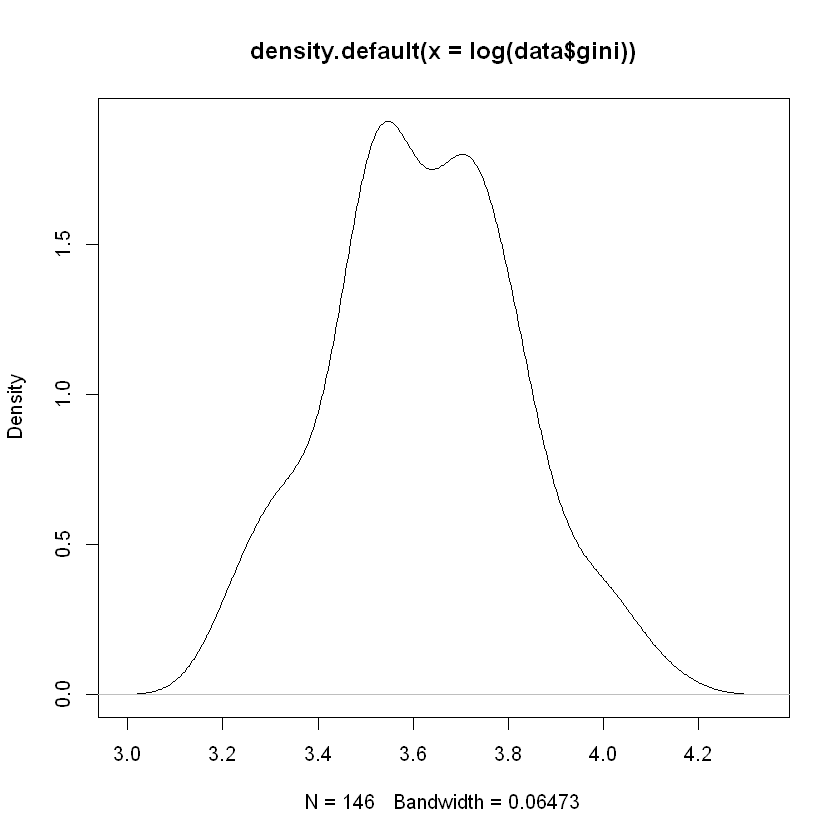

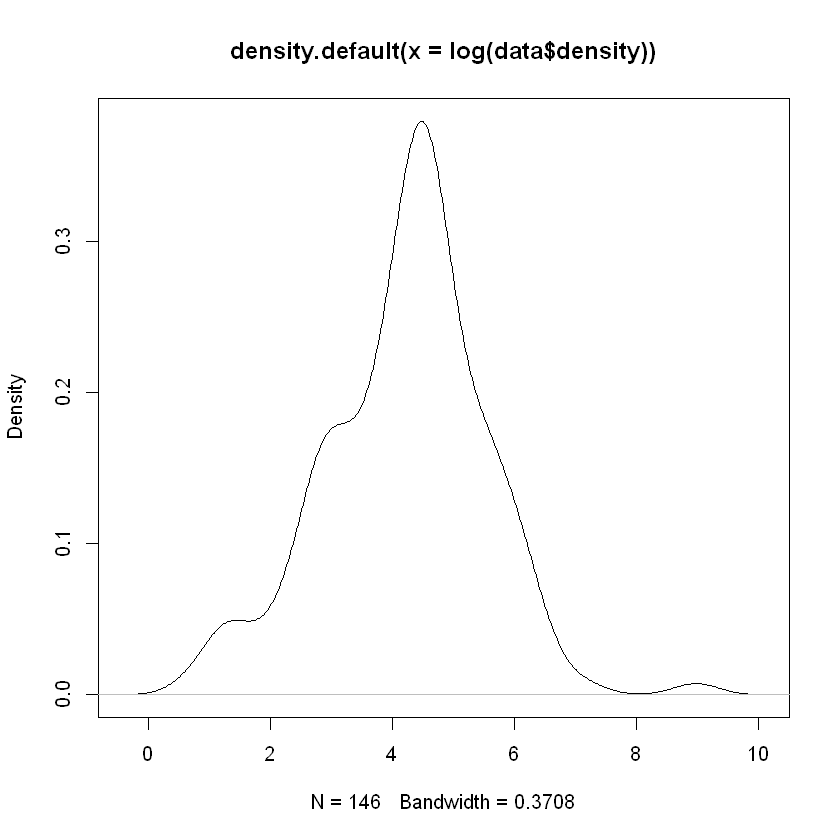

Warning message:
"Unknown or uninitialised column: `trade`."

ERROR: Error in log(data$trade): non-numeric argument to mathematical function


Warning message:
"Unknown or uninitialised column: `trade`."

ERROR: Error in log(data$trade): non-numeric argument to mathematical function


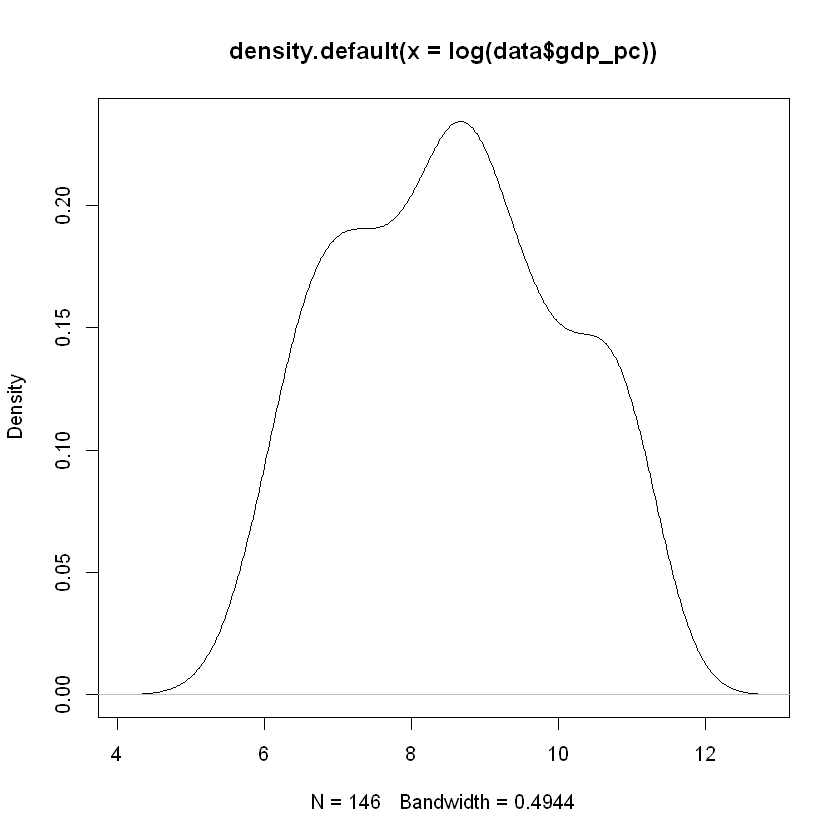

In [6]:
## Simple feature eng.
plot(density(log(data$gini))); data$gini_log <- log(data$gini) 
plot(density(log(data$density))); data$density_log <- log(data$density) 
plot(density(log(data$gdp_pc))); data$gdp_pc_log <- log(data$gdp_pc) 
plot(density(log(data$trade))); data$trade_log <- log(data$trade) 

colnames(data)